In [1]:
#Pattern Recognition Project - 1st deliverable
#Theodoros Lioupis 9733
#Evgenia Stavrianidou 9686

In [25]:
#imports
#!pip install numpy 
#!pip install matplotlib
#!pip install scipy
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import axes3d

In [26]:
#data given
m1 = [0.4,0.8] #the mean values of the 2 indeces for P(x|w1)
m2 = [1.5,2.7] #the mean values of the 2 indeces for P(x|w2)

S = np.array([1.5,0,0,0.8]) #The covariance table-1D of the 2 indeces, same for P(x|w1) an P(x|w2)
S = S.reshape(2,2) #The covariance table-2D
var1 = S[0,0] #variance of index 1, same for P(x|w1) an P(x|w2)
var2 = S[1,1] #variance of index 2, same for P(x|w1) an P(x|w2)
s1 = math.sqrt(var1) #std of index 1, same for P(x|w1) an P(x|w2)
s2 = math.sqrt(var2) #std of index 2, same for P(x|w1) an P(x|w2)

pw1 = 0.95 #P(w1)
pw2 = 0.05 #P(w2)

Some comments on the results:

Firstly, the indeces in reality can not take negative values.
Here we use negative values to understand better the P(X|wi).

Figure 1-2:
We see the two pdfs for the two indeces separatly.
We observe that the P(x|w2) (w2:possible cancer) is shifted to the right and even more for index 2.

Figure 3:
A random sample X = {X1,X2}.
We notice that the X of w1 do not mix a lot with the X of w2.
So, we see here too that w2 is shifted compared with w1.

Figure 4:
The two Bivariate pdfs of P(x|w1) and P(x|w2).
On the bottom we see the equal probability curves, meaning that two sets X data on the same curve have the same probability 
of being healthy or possibly having cancer.

Example:

If a set of X = {X1,X2} is on a high propability curve of P(X|w1) then we can decide that the patient is healthy.

If a set of X = {X1,X2} is on a low propability curve of P(X|w1) then we can decide that the patient is not healthy.
Furthermore, if X is at the same time on a high prop

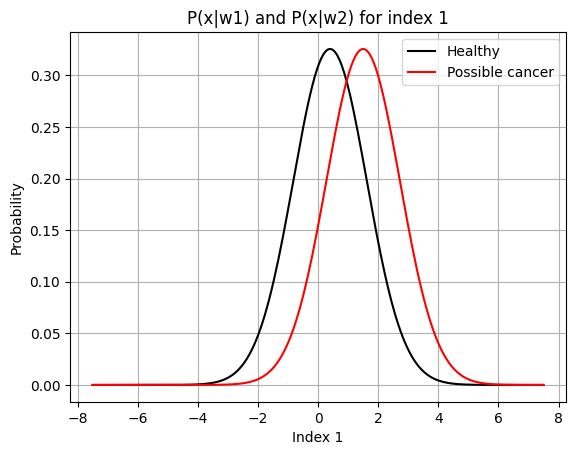

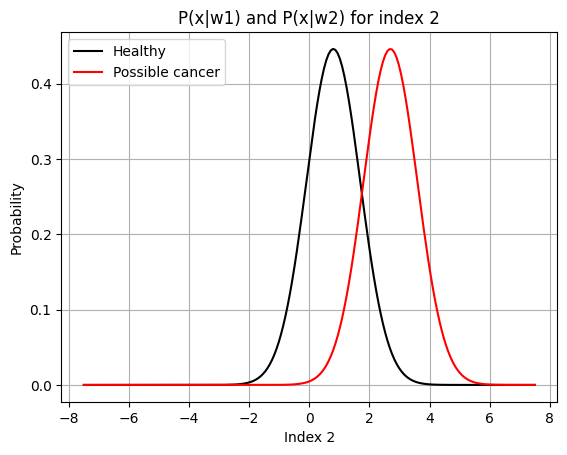

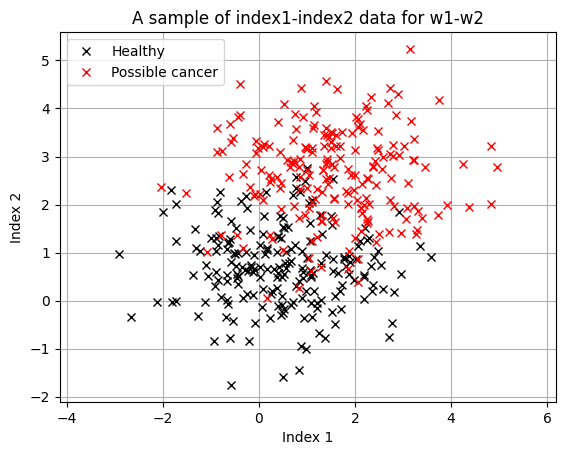

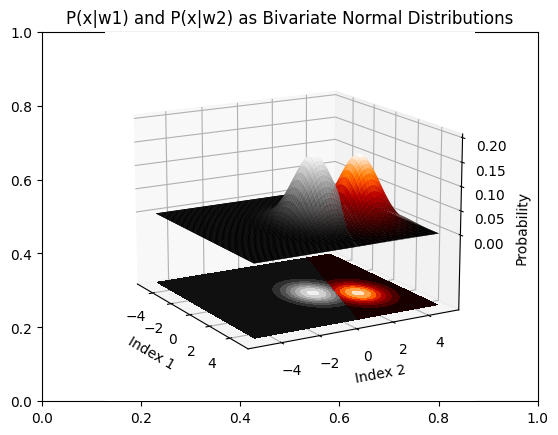

In [60]:
#Question A1

x = np.linspace(-7.5,7.5,200) #Creating a series of data in range of -7.5 to 7.5.
#In reality X can not be negative because there are not negative measurements in blood tests!!!
 
#A function to calculate Y ~ Normal Distrobution
def normal_dist(x , mean , std):
    pdf = (1/(math.sqrt(2*np.pi)*std)) * np.exp(-0.5*((x-mean)/std)**2)
    return pdf
 
#Apply the above function to x
#P(x|w1) of both medical indeces independently
pdf_w1_i1 = normal_dist(x,m1[0],s1) #index 1
pdf_w1_i2 = normal_dist(x,m1[1],s2) #index 2
#P(x|w2) of both medical indeces independently
pdf_w2_i1 = normal_dist(x,m2[0],s1) #index 1
pdf_w2_i2 = normal_dist(x,m2[1],s2) #index 2
 
#Plotting the Results for w1(Healthy) and w2(cancer) for index 1
plt.figure(1)
plt.title('P(x|w1) and P(x|w2) for index 1')
plt.plot(x,pdf_w1_i1 , color = 'black', label = 'Healthy')
plt.plot(x,pdf_w2_i1 , color = 'red', label = 'Possible cancer')
plt.legend()
plt.xlabel('Index 1')
plt.ylabel('Probability')
plt.grid()

#Plotting the Results for w1(Healthy) and w2(cancer) for index 2
plt.figure(2)
plt.title('P(x|w1) and P(x|w2) for index 2')
plt.plot(x,pdf_w1_i2 , color = 'black', label = 'Healthy')
plt.plot(x,pdf_w2_i2 , color = 'red', label = 'Possible cancer')
plt.legend()
plt.xlabel('Index 2')
plt.ylabel('Probability')
plt.grid()

#Plotting a random sample of index1-index2 data for w1-w2
plt.figure(3)
plt.title('A sample of index1-index2 data for w1-w2')
#index1-index2 data for w1
(i1_w1, i2_w1) = np.random.multivariate_normal(m1, S, 200).T
plt.plot(i1_w1, i2_w1, 'x',color = 'black', label = 'Healthy')
#index1-index2 data for w2
(i1_w2, i2_w2) = np.random.multivariate_normal(m2, S, 200).T
plt.plot(i1_w2, i2_w2,'x',color = 'red', label = 'Possible cancer')
plt.legend()
plt.axis('equal')
plt.xlabel('Index 1')
plt.ylabel('Index 2')
plt.grid()

x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

pdf_w1 = multivariate_normal(m1,S)
pdf_w2 = multivariate_normal(m2,S)
pdf_w1 = pdf_w1.pdf(pos)
pdf_w2 = pdf_w2.pdf(pos)

fig = plt.figure(4)
plt.title('P(x|w1) and P(x|w2) as Bivariate Normal Distributions')
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, np.where(pdf_w1<pdf_w2,pdf_w1,np.nan), rstride=6, cstride=6, linewidth=1, antialiased=True, cmap=plt.cm.gist_gray, label = 'Healthy')
ax.plot_surface(X, Y, pdf_w2, rstride=3, cstride=3, linewidth=1, antialiased=True, cmap=plt.cm.gist_heat, label = 'Possible cancer')
ax.plot_surface(X, Y, np.where(pdf_w1>=pdf_w2,pdf_w1,np.nan), rstride=3, cstride=3, linewidth=1, antialiased=True, cmap=plt.cm.gist_gray, label = 'Possible cancer')
cset = ax.contourf(X, Y, np.where(pdf_w1<pdf_w2,pdf_w1,np.nan), zdir='z', offset=-0.15, cmap=plt.cm.gist_gray)
cset = ax.contourf(X, Y, pdf_w2, zdir='z', offset=-0.15, cmap=plt.cm.gist_heat)
cset = ax.contourf(X, Y,np.where(pdf_w1>=pdf_w2,pdf_w1,np.nan), zdir='z', offset=-0.15, cmap=plt.cm.gist_gray)
ax.set_xlabel('Index 1')
ax.set_ylabel('Index 2')
ax.set_zlabel('Probability')

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(15, -30)

print('Some comments on the results:\n')
print('Firstly, the indeces in reality can not take negative values.\nHere we use negative values to understand better the P(X|wi).\n')
print('Figure 1-2:\nWe see the two pdfs for the two indeces separatly.\nWe observe that the P(x|w2) (w2:possible cancer) is shifted to the right and even more for index 2.\n')
print('Figure 3:\nA random sample X = {X1,X2}.\nWe notice that the X of w1 do not mix a lot with the X of w2.\nSo, we see here too that w2 is shifted compared with w1.\n')
print('Figure 4:\nThe two Bivariate pdfs of P(x|w1) and P(x|w2).\nOn the bottom we see the equal probability curves, meaning that two sets X data on the same curve have the same probability \nof being healthy or possibly having cancer.\n')
print('Example:\n\nIf a set of X = {X1,X2} is on a high propability curve of P(X|w1) then we can decide that the patient is healthy.')
print('\nIf a set of X = {X1,X2} is on a low propability curve of P(X|w1) then we can decide that the patient is not healthy.\nFurthermore, if X is at the same time on a high propability curve of P(X|w2) the the patient must be tested for cancer.')
print('\nIf a set of X = {X1,X2} is at the same time on a curve of P(X|w1) and a curve of P(X|w2) of equal propability, then we can not be sure of our decision. Maybe more testing must be done to be sure.')